In [2]:
#Importation des librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

2024-06-18 14:27:25.243558: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 14:27:25.249355: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 14:27:25.335896: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 14:27:27.082609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Toutees bases
#https://keras.io/api/datasets/

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
np.min(X_train)
np.max(X_train)

255

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Matplotlib is building the font cache; this may take a moment.


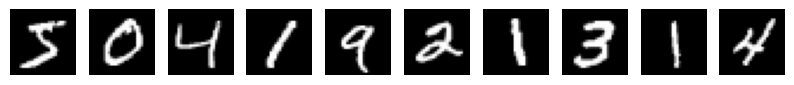

In [9]:
import matplotlib.pyplot as plt
# Afficher 10 images du dataset
# Crée une nouvelle figure de taille 10x1 pouces
plt.figure(figsize=(10, 1))

# Boucle sur les 10 premières images de X_train
for i in range(10):
    # Ajoute un sous-plot dans une grille de 1 ligne par 10 colonnes
    plt.subplot(1, 10, i+1)
    # Affiche l'image i de X_train en niveaux de gris
    plt.imshow(X_train[i], cmap='gray')
    # Désactive les axes pour une visualisation plus propre
    plt.axis('off')

# Affiche la figure contenant les 10 images
plt.show()

In [10]:
# Normalisation des données
# Les valeurs de pixels dans les images MNIST vont de 0 à 255.
# - 0 représente le noir complet
# - 255 représente le blanc complet
# Nous divisons ces valeurs par 255 pour les ramener dans la plage [0, 1].
# Cela améliore la stabilité numérique et accélère la convergence du modèle d'apprentissage.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical
# Les étiquettes sont converties en vecteurs binaires.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
# Construction du modèle de réseau de neurones
model = models.Sequential()

# Aplatissement des images 28x28 en un vecteur de 784 éléments
# Le modèle de réseau de neurones denses nécessite un vecteur d'entrée 1D,
# donc nous devons aplatir les images 2D en un vecteur 1D.
model.add(layers.Flatten(input_shape=(28, 28)))  # Aplatissement des images 28x28 en un vecteur de 784 éléments
model.add(layers.Dense(128, activation='relu'))  # Première couche dense avec 128 neurones et activation ReLU
model.add(layers.Dense(64, activation='relu'))  # Deuxième couche dense avec 64 neurones et activation ReLU
model.add(layers.Dense(10, activation='softmax'))  # Couche de sortie avec 10 neurones (un pour chaque chiffre) et activation softmax



/home/oscar/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compilation du modèle
# Nous utilisons 'adam' comme optimiseur car il est efficace et largement utilisé.
# 'categorical_crossentropy' est utilisé comme fonction de perte car nous avons des étiquettes catégorielles.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Entraînement du modèle
# Nous entraînons le modèle sur les données d'entraînement (X_train, y_train) et validons sur les données de test (X_test, y_test).
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


2024-06-18 14:36:18.606134: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8697 - loss: 0.4569

2024-06-18 14:36:35.218848: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8698 - loss: 0.4565 - val_accuracy: 0.9585 - val_loss: 0.1403
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9655 - loss: 0.1137 - val_accuracy: 0.9628 - val_loss: 0.1207
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9776 - loss: 0.0721 - val_accuracy: 0.9697 - val_loss: 0.1027
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9707 - val_loss: 0.1041
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9878 - loss: 0.0381 - val_accuracy: 0.9732 - val_loss: 0.0921
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9715 - val_loss: 0.1094
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9919 - loss: 0.0262 - val_accuracy: 0.9718 - val_loss: 0.1130
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9943 - loss: 0.01

In [19]:
# Évaluation du modèle
# Nous évaluons les performances du modèle sur les données de test.
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

2024-06-18 14:43:21.349689: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 2s - 5ms/step - accuracy: 0.9774 - loss: 0.1250

Test accuracy: 0.977400004863739


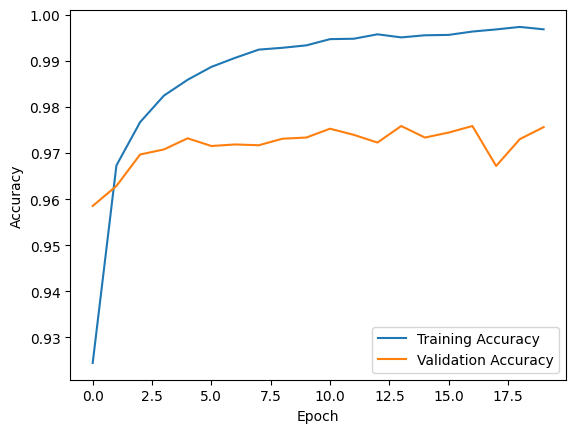

In [20]:
# Visualisation des performances de l'entraînement
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

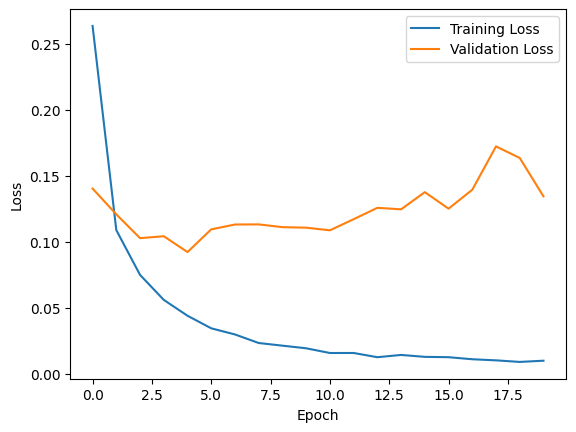

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Prédiction sur une nouvelle base de données (exemple avec les données de test)
predictions = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


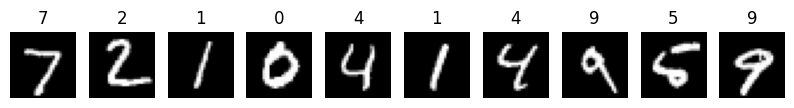

In [23]:
# Affichage des prédictions pour les 10 premières images du dataset de test
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()